In [1]:
# IMPORT LIBRARIES
using Distributions, Turing, StatsPlots, Random, RDatasets

### Assignment 2: hierarchical models

In [2]:
# FETCH WARP BREAKS DATA SET
df = RDatasets.dataset("datasets", "warpbreaks")

,Breaks,Wool,Tension
,Int32,Cat…,Cat…
1,26,A,L
2,30,A,L
3,54,A,L
4,25,A,L
5,70,A,L
6,52,A,L
7,51,A,L
8,26,A,L
9,67,A,L


In [270]:
# DIVIDE BREAKS INTO GROUPS
breaks_a = df.Breaks[df.Wool .== "A"]
breaks_b = df.Breaks[df.Wool .== "B"]

# DIVIDE TENSION INTO GROUPS
tension_a = df.Tension[df.Wool .== "A"]
tension_b = df.Tension[df.Wool .== "B"]

# DIVIDE BREAKS GROUPS INTO GROUPS OF TENSION
breaks_a_tension_h = breaks_a[tension_a .== "H"]  # GROUP A
breaks_a_tension_m = breaks_a[tension_a .== "M"]
breaks_a_tension_l = breaks_a[tension_a .== "L"]

breaks_b_tension_h = breaks_b[tension_b .== "H"]  # GROUP B
breaks_b_tension_m = breaks_b[tension_b .== "M"]
breaks_b_tension_l = breaks_b[tension_b .== "L"]

9-element Array{Int32,1}:
 27
 14
 29
 19
 29
 31
 41
 20
 44

Infer the probability distribution of warp breaks for each of two wool types. Compare the results under separate and hierarchical models. Conduct two studies:

1. Ignore warp tension and compare wool types based on all experiments.
2. Account for warp tension in both the hierarchical model and the separate model.

#### Separate Model: Ignore wrap tension & Compare wool types based on all experiments

In [94]:
# WOOL SEPARATE MODEL OF TOTAL BREAKS FOR EACH TYPE
@model function wool_separate(breaks)    
    for i in eachindex(breaks)
        μ ~ Normal(20, 5)
        σ ~ Exponential(2)
        breaks[i] ~ Normal(μ, σ)
    end
end

wool_separate (generic function with 2 methods)

In [252]:
df.Tension

54-element CategoricalArrays.CategoricalArray{String,1,UInt8}:
 "L"
 "L"
 "L"
 "L"
 "L"
 "L"
 "L"
 "L"
 "L"
 "M"
 "M"
 "M"
 "M"
 ⋮
 "M"
 "M"
 "M"
 "H"
 "H"
 "H"
 "H"
 "H"
 "H"
 "H"
 "H"
 "H"

##### Breaks Data Groups A and B: Average and Std.

In [89]:
# AVERAGE BREAKS GROUP A
sum(breaks_a) / length(breaks_a)

31.037037037037038

In [90]:
# STD BREAKS GROUP A
std(breaks_a)

15.851429155372909

In [91]:
# AVERAGE BREAKS GROUP B
sum(breaks_b) / length(breaks_b)

25.25925925925926

In [92]:
# STD BREAKS GROUP B
std(breaks_b)

9.300920519342293

In [95]:
# CHAIN BREAKS OF TYPE A AND B
chn_a = sample(wool_separate(breaks_a), NUTS(), MCMCThreads(), 1000, 4)
chn_b = sample(wool_separate(breaks_b), NUTS(), MCMCThreads(), 1000, 4)

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC C:\Users\nitsa\.julia\packages\AbstractMCMC\Nw3Wn\src\sample.jl:228
┌ Info: Found initial step size
│   ϵ = 0.0125
└ @ Turing.Inference C:\Users\nitsa\.julia\packages\Turing\PyTy2\src\inference\hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Info: Found initial step size
│   ϵ = 0.003125
└ @ Turing.Inference C:\Users\nitsa\.julia\packages\Turing\PyTy2\src\inference\hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (t

LoadError: [91msyntax: missing comma or ) in argument list[39m

### Posterior of Breaks Types: A and B, under Separate Model, with out Wrap tension

##### Posterior Statistics of Groups A and B

In [213]:
print(
    "Posterior Statisitcs:\n\n",
    "Group A:\n",
    "μ Parameter:\n",
    "Average: ", sum(chn_a[:μ]) / length(chn_a[:μ]), "\n",
    "Std.: ", std(chn_a[:μ]),
    "\n\nσ Parameter:\n",
    "Average: ", sum(chn_a[:σ]) / length(chn_a[:σ]), "\n",
    "Std.: ", std(chn_a[:σ]), "\n\n",
    
    "Group B:\n",
    "μ Parameter:\n",
    "Average: ", sum(chn_b[:μ]) / length(chn_b[:μ]), "\n",
    "Std.: ", std(chn_b[:μ]),
    "\n\nσ Parameter:\n",
    "Average: ", sum(chn_b[:σ]) / length(chn_b[:σ]), "\n",
    "Std.: ", std(chn_b[:σ]), "\n\n"
)

Posterior Statisitcs:

Group A:
μ Parameter:
Average: 22.842257514346528
Std.: 0.850177680750431

σ Parameter:
Average: 8.538785049228045
Std.: 0.4801833192034901

Group B:
μ Parameter:
Average: 22.276470497814863
Std.: 0.7254322162647939

σ Parameter:
Average: 5.72835090727698
Std.: 0.3823083171873714



##### Posterior Plotting of Groups A and B

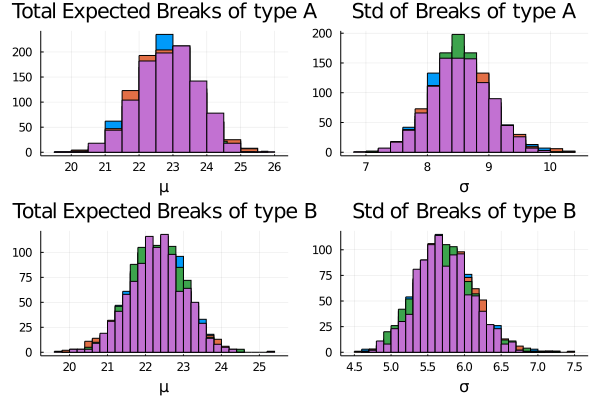

In [83]:
let
    plot(layout=4)
    histogram!(chn_a[:μ], xlabel="μ", label=missing,  subplot=1, title="Total Expected Breaks of type A")
    histogram!(chn_a[:σ], xlabel="σ", label=missing, subplot=2, title="Std of Breaks of type A")
    histogram!(chn_b[:μ], xlabel="μ", label=missing,  subplot=3, title="Total Expected Breaks of type B")
    histogram!(chn_b[:σ], xlabel="σ", label=missing, subplot=4, title="Std of Breaks of type B")
end

In [161]:
# WOOL SEPARATE MODEL OF TOTAL BREAKS FOR EACH TYPE
@model function wool_hirerchial(breaks_groups)
    τ ~ LogNormal(0, 10)  # Groups difference factor
    
    μ ~ Normal(20, 5)  # Breaks total average
    σ ~ LogNormal(5, 1)  # Breaks total std.
    η ~ MvNormal([0, 0], 1)  # Group difference
    
    θ = μ .+ τ .* η  # Constructed Hyperparameter

    for i in eachindex(breaks_groups)
        for j in eachindex(breaks_groups[i])
            breaks_groups[i][j] ~ Normal(θ[i], σ)
        end
    end
end

wool_hirerchial (generic function with 1 method)

In [244]:
# CHAIN BREAKS HIRERCHIAL
chn = sample(wool_hirerchial([breaks_a, breaks_b]), NUTS(), MCMCThreads(), 1000, 4)

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC C:\Users\nitsa\.julia\packages\AbstractMCMC\Nw3Wn\src\sample.jl:228
┌ Info: Found initial step size
│   ϵ = 0.025
└ @ Turing.Inference C:\Users\nitsa\.julia\packages\Turing\PyTy2\src\inference\hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, true, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current propos

Chains MCMC chain (1000×17×4 Array{Float64,3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = η[1], η[2], μ, σ, τ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

        η[1]    0.0989    0.9947     0.0157    0.0355    769.1441    1.0028
        η[2]   -0.0228    0.9879     0.0156    0.0232   1472.6976    1.0003
           μ   27.1186    1.7723     0.0280    0.0510   1161.8235    1.0032
           σ   13.7186    1.3776     0.0218    0.0357   1184.8285    1.0016
           τ    0.5885    2.0117     0.0318    0.1078    398.4716    1.0089

Quantiles
  parameters      2.5%     25.0%    

In [219]:
# AVERAGE BREAKS
sum(df.Breaks) / length(df.Breaks)

28.14814814814815

In [220]:
# STD BREAKS
std(df.Breaks)

13.198638305132597

### Posterior of Wool Breaks, under Hirerchial Model, with out Wrap tension

##### Posterior Statistics of hirarchial model results

In [250]:
# POSTERIOR CONSTRUCTED HYPYERPARAMETER VALUE
θmean = mean(chn[:μ]) .+ mean(chn[:τ]) .* mean(Array(group(chn, :η))) # Constructed Hyperparameter
θstd = std(chn[:μ]) .+ std(chn[:τ]) .* std(Array(group(chn, :η))) # Constructed Hyperparameter

# DIVIDE PARAMETER η TO GROUP A AND GROUP B
η = Array(group(chn, :η))

η1 = []  # GROUP A
η2 = []  # GROUP B

for i in eachindex(η)
    if i % 2 == 0
        push!(η1, η[i])
    else
        push!(η2, η[i])
    end
end

In [249]:
print(
    "Posterior Statisitcs:\n\n",
    "θ Hyperparameter (total average, μ .+ τ .* η):\n",
    "Average: ", θmean, "\n",
    "Std.: ", θstd,
    
    "\n\nσ Parameter (Breaks total std.):\n",
    "Average: ", sum(chn[:σ]) / length(chn[:σ]), "\n",
    "Std.: ", std(chn[:σ]), "\n\n",
    
    "τ Parameter (Groups difference factor):\n",
    "Average: ", sum(chn[:τ]) / length(chn[:τ]), "\n",
    "Std.: ", std(chn[:τ]),
    
    "\n\nμ Parameter (Breaks total average):\n",
    "Average: ", sum(chn[:μ]) / length(chn[:μ]), "\n",
    "Std.: ", std(chn[:μ]),
        
    "\n\nη Parameter (Groups difference):\n",
    "Average: ", sum(η) / length(η), "\n",
    "Std.: ", std(η),
    
    "\n\nη Parameter (Group A difference):\n",
    "Average: ", sum(η1) / length(η1), "\n",
    "Std.: ", std(η1),
    
    "\n\nη Parameter (Group B difference):\n",
    "Average: ", sum(η2) / length(η2), "\n",
    "Std.: ", std(η2),
)

Posterior Statisitcs:

θ Hyperparameter (total average, μ .+ τ .* η):
Average: 27.14101801440111
Std.: 3.770188713890888

σ Parameter (Breaks total std.):
Average: 13.71858809886631
Std.: 1.3775597619910795

τ Parameter (Groups difference factor):
Average: 0.5885027301782284
Std.: 2.0116603849069445

μ Parameter (Breaks total average):
Average: 27.118630936615673
Std.: 1.7723384300721414

η Parameter (Groups difference):
Average: 0.038040737344847614
Std.: 0.9931349738793823

η Parameter (Group A difference):
Average: 0.04577830506075506
Std.: 0.9966147572173112

η Parameter (Group B difference):
Average: 0.030303169628940245
Std.: 0.9897070523442896

##### Posterior Plotting of the hirerchial model results

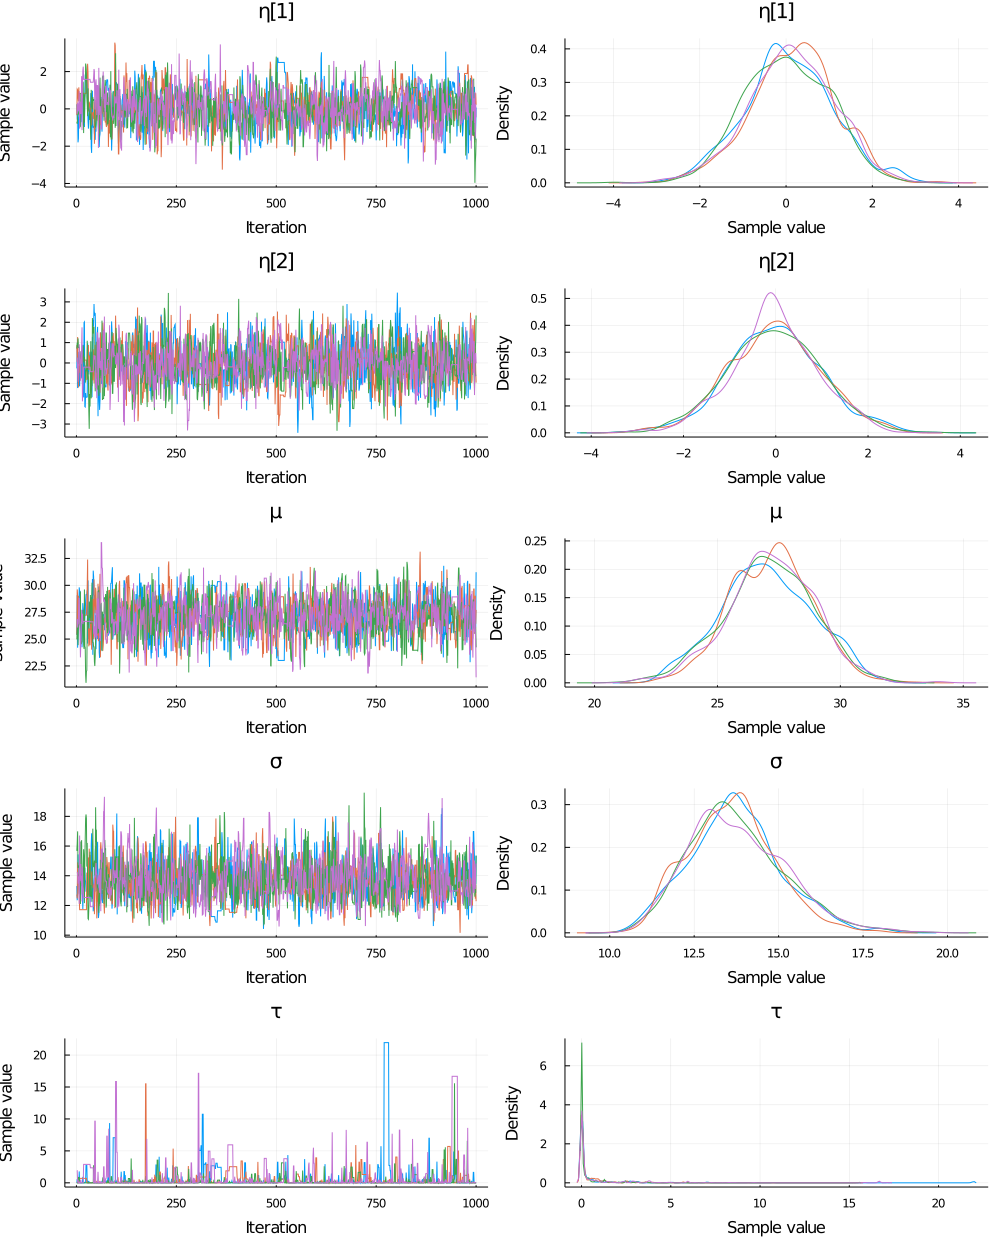

In [251]:
# PLOT CHAIN PARAMETERS
plot(chn)

#### Account for warp tension in both the hierarchical model and the separate model.

In [283]:
# WOOL SEPARATE MODEL OF TOTAL BREAKS FOR EACH TYPE WITH TENSION ACCOUNT
@model function wool_separate_tension(breaks, tension)    
    α0 ~ Normal(0, 1.5)
    αm ~ Normal(0, 1.5)
    αh ~ Normal(0, 1.5)
    
    for i in eachindex(breaks)
        μ ~ Normal(α0, 5)
        σ ~ Exponential(2)
        
        # α PARAMETER effect is very similar to it's Pre defined distribution
        if tension == "M"
            μ += αm
        elseif tension == "H"
            μ += αm + αh
        end
        
        breaks[i] ~ Normal(μ, σ)
    end
end

wool_separate_tension (generic function with 1 method)

In [284]:
# CHAIN BREAKS OF TYPE A AND B
chn_a_tens = sample(wool_separate_tension(breaks_a, tension_a), NUTS(), MCMCThreads(), 1000, 4)
chn_b_tens = sample(wool_separate_tension(breaks_b, tension_b), NUTS(), MCMCThreads(), 1000, 4)

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC C:\Users\nitsa\.julia\packages\AbstractMCMC\Nw3Wn\src\sample.jl:228
┌ Info: Found initial step size
│   ϵ = 0.00625
└ @ Turing.Inference C:\Users\nitsa\.julia\packages\Turing\PyTy2\src\inference\hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference C:\Users\nitsa\.julia\packages\Turing\PyTy2\src\inference\hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
Sampling (1 threads):  50%|███████████████              |  ETA: 0:00:02┌ Info: Found initial step size
│   ϵ = 0.

Chains MCMC chain (1000×17×4 Array{Float64,3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = α0, αh, αm, μ, σ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

          α0   11.4734    1.2597     0.0199    0.0228   2889.7412    1.0006
          αh    0.0007    1.5209     0.0240    0.0256   4213.4369    1.0008
          αm    0.0213    1.4544     0.0230    0.0189   4706.2979    0.9992
           μ   16.1771    1.3859     0.0219    0.0281   2585.5516    1.0010
           σ    6.9445    0.5351     0.0085    0.0095   3205.2735    1.0001

Quantiles
  parameters      2.5%     25.0%     50

In [276]:
# PRINT DATA STATISTICS
print(
    "breaks_a_tension_h mean: ", mean(breaks_a_tension_h), "\n",
    "breaks_a_tension_h std.: ", std(breaks_a_tension_h), "\n\n",
    
    "breaks_a_tension_m mean: ", mean(breaks_a_tension_m), "\n",
    "breaks_a_tension_m std.: ", std(breaks_a_tension_m), "\n\n",
    
    "breaks_a_tension_l mean: ", mean(breaks_a_tension_l), "\n",
    "breaks_a_tension_l std.: ", std(breaks_a_tension_l), "\n\n",
    
    "breaks_b_tension_h mean: ", mean(breaks_b_tension_h), "\n",
    "breaks_b_tension_h std.: ", std(breaks_b_tension_h), "\n\n",
    
    "breaks_b_tension_m mean: ", mean(breaks_b_tension_m), "\n",
    "breaks_b_tension_m std.: ", std(breaks_b_tension_m), "\n\n",
    
    "breaks_b_tension_l mean: ", mean(breaks_b_tension_l), "\n",
    "breaks_b_tension_l std.: ", std(breaks_b_tension_l), "\n\n",
)

breaks_a_tension_h mean: 24.555555555555557
breaks_a_tension_h std.: 10.27267140415665

breaks_a_tension_m mean: 24.0
breaks_a_tension_m std.: 8.660254037844387

breaks_a_tension_l mean: 44.55555555555556
breaks_a_tension_l std.: 18.097728525364108

breaks_b_tension_h mean: 18.77777777777778
breaks_b_tension_h std.: 4.893306085301066

breaks_b_tension_m mean: 28.77777777777778
breaks_b_tension_m std.: 9.431036233863406

breaks_b_tension_l mean: 28.22222222222222
breaks_b_tension_l std.: 9.85872428078017



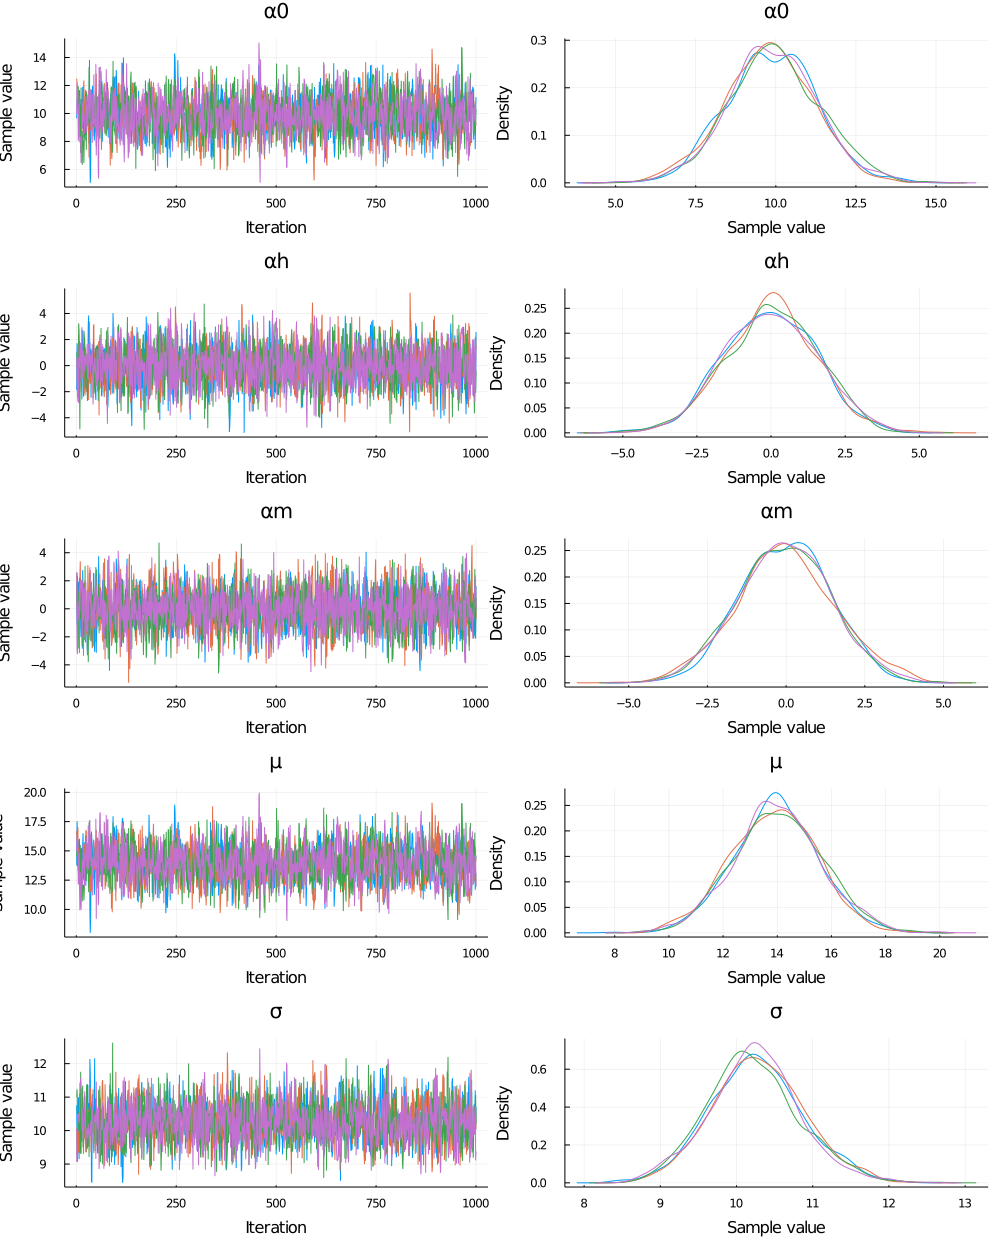

In [286]:
plot(chn_a_tens)

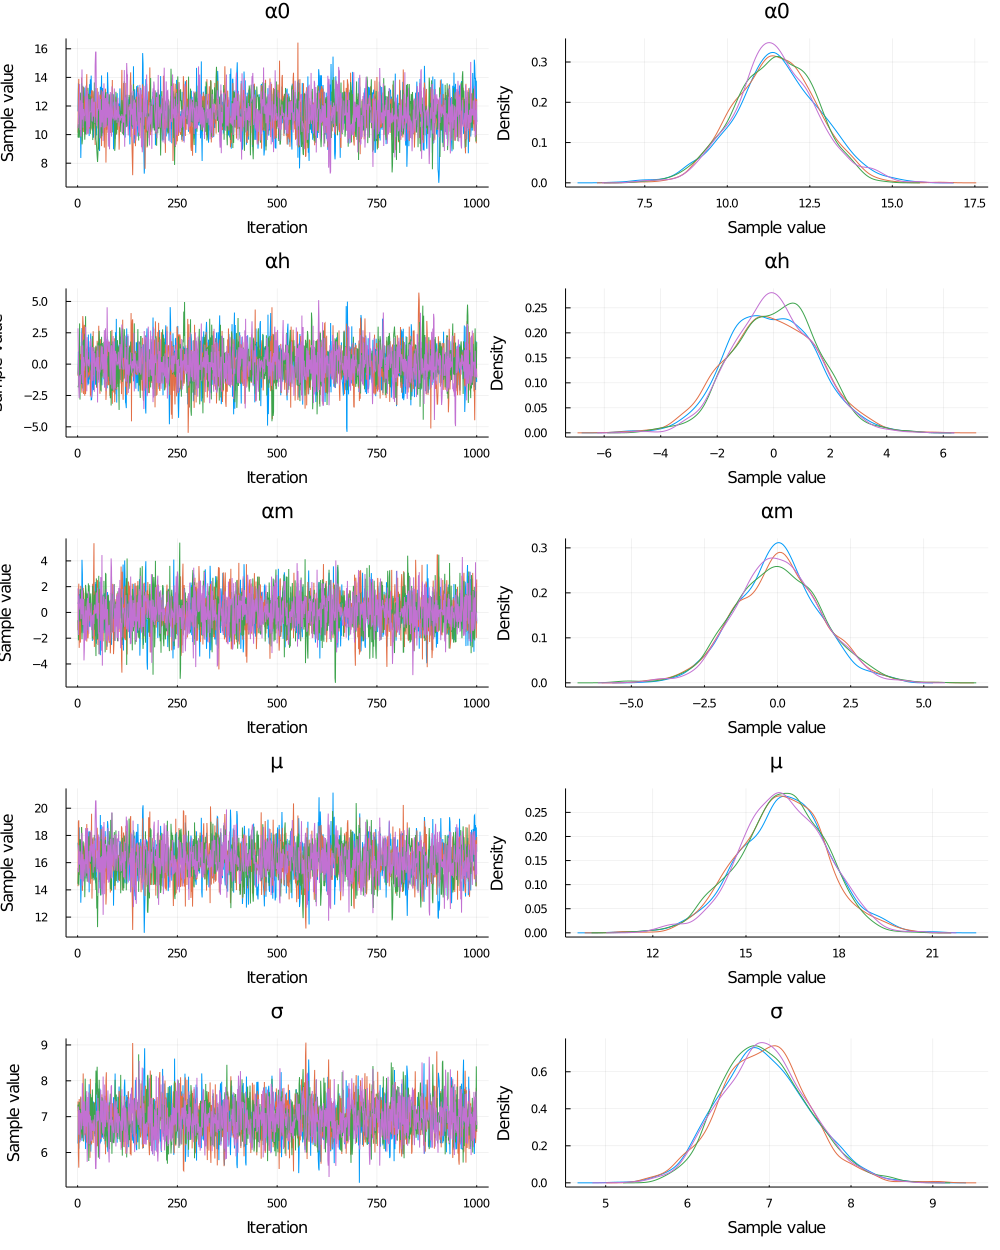

In [285]:
plot(chn_b_tens)